In [1]:
from allthethings import PyNetwork, PyPipe_ps
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "indata/3pipes3.inp"     #location of .inp file
fcr = "indata/bcs3pipesr.config"  #location of .config file
fc0 = "indata/bcs3pipes0.config"  #location of .config file
mtype = 1                       #model used along network edges. 1 for Preissman Slot. 0 for uniform
n0 = PyNetwork(fi, fc0, mtype)   #a network object
nr = PyNetwork(fi, fcr,mtype)
print n0 



Network at address 0x7f7fc9733d80 with 4 nodes and 3 edges



In [3]:
#n1.showCurrentData()    
dt = n0.T/n0.M
V00 = n0.getTotalVolume()
n0.runForwardProblem(dt)  #solve up to time T
V0r = nr.getTotalVolume()
nr.runForwardProblem(dt)


In [4]:
print "Elapsed time is %.5f s, solve time is %.5f s" %(n0.T,n0.solve_time)
print "Initial Volume is %f"%V00

dV0 = V00-n0.getTotalVolume()
dVr = V0r-nr.getTotalVolume()
print "         Q =0            reflecting       "
print "V0       %3.5f        %3.5f" %(V00,V0r)
print "Vf       %3.5f        %3.5f" %(n0.getTotalVolume(), nr.getTotalVolume())
print "dV       %3.5f          %3.5f" % (dV0,dVr)
print "dV/V0    %e     %e"%(dV0/V00, dVr/V0r)

Elapsed time is 12.00000 s, solve time is 3.55305 s
Initial Volume is 168.393590
         Q =0            reflecting       
V0       168.39359        168.39359
Vf       167.86431        168.39359
dV       0.52928          0.00000
dV/V0    3.143103e-03     9.941226e-14


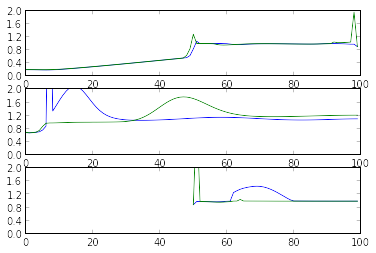

0.571655523077
[120.3269019486743, 120.48818235803347, 120.16401992194578]
cmax*dt/dx = 0.813530 
0.902334751664
0.680487552897
0.884392005669
max H(r)    1.956660 1.770820 3.667371
max H(0)    1.066921 7.260046 1.449602
59.6319407223
379.120915502


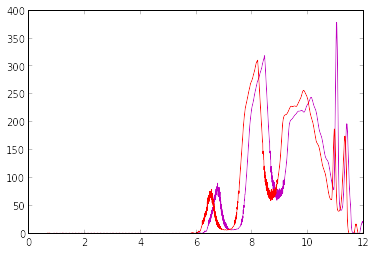

In [5]:
qi = [n0.q(i) for i in range(n0.Nedges)]
hi = [n0.getHofA(i) for i in range(3)]
hir = [nr.getHofA(i) for i in range(3)]
Ai = [qi[i][0:n0.Ns[i]] for i in range(3)]
Qi = [qi[i][n0.Ns[i]:] for i in range(3)] 
u= []
ymaxs = [ceil(max(h)) for h in hi]
for i in range(3):
        u.append([Qi[i][k]/Ai[i][k] for k in range(n0.Ns[i])])

fig,ax = plt.subplots(nrows = n0.Nedges)
x0 = [0,0,100.-n0.Ns[2]]
for k in range(n0.Nedges):
    x = np.arange(0,n0.Ls[k], n0.Ls[k]/n0.Ns[k])+x0[k]*np.ones(size(hi[k]))
    ax[k].plot(x,hi[k],'b')
    ax[k].plot(x,hir[k],'g')
    ax[k].set_ylim([0,ymaxs[i]])
    ax[k].set_xlim([0,100])
    ax[k].set_yticks(np.linspace(0,ymaxs[i],6))
plt.show()
print n0.getAveGradH(600)
umax = max(abs(max(ui)) for ui in u)
print n0.cmax
print "cmax*dt/dx = %f "%((max(n0.a)+umax)*dt/n0.Ls[0]*n0.Ns[0])
print hi[0][99]
print hi[1][0]
print hi[2][0]
 
print "max H(r)    %f %f %f"%(max(hir[0]), max(hir[1]), max(hir[2]))
print "max H(0)    %f %f %f"%(max(hi[0]), max(hi[1]), max(hi[2]))
Hbar = [n0.getAveGradH(i) for i in range(n0.M+1)]
Hbarr = [nr.getAveGradH(i) for i in range(nr.M+1)]
print mean(Hbar)
t = np.linspace(0,n0.T,n0.M+1)
plot(t,Hbar,'m')
plot(t,Hbarr,'r')
print max(Hbar)

In [6]:
ndof = 16
wn = np.array([1,2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
opt1 = PyBC_opt_dh(fi, fc0, ndof, x0, 0, wn)
opt1.compute_f()
f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype

f is 471.148231
T is 12.000000
Using Hermite modes


In [7]:
opt1.solve()
#opt1.x
#opt1.r


Final f/Initial f  = 0.485704960633412


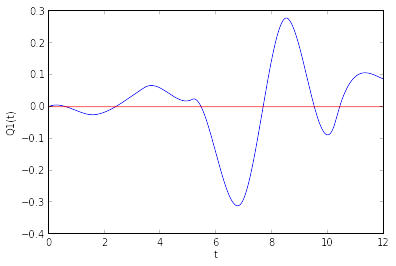

In [8]:
#import matplotlib.pyplot as plt
ff = opt1.f
Q1 = opt1.getBCtimeseries(0)
Q2 = opt1.getBCtimeseries(1)
print "Final f/Initial f  = %.15f"%(ff/f0)
t = np.linspace(0,opt1.T, opt1.M+1)
plot(t,Q1,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q1(t)')



[0.0009847242409261952, 0.035215674129956936, -0.024067291657856316, 0.016095536449332395, 0.06028155437123182, 0.05479312845667905, 0.02332638152581912, 0.04882603172624873, -0.30701406977597656, 0.07982249828454324, 0.2763289856801307, -0.07187255173384932, -0.04159773700271523, 0.33919260332244067, 0.0866207324543403, -0.037460466300916255, 3.236502990537264e-06, -4.5601582418576745e-05, 4.521645889614195e-05, -6.968154020664042e-05, 3.417651734515255e-05, 1.2928360744863902e-06, -2.7145306641328345e-05, 1.6671883614908138e-05, 3.351108215654427e-05, -6.98564373279958e-05, -7.516067693706645e-06, 2.342476827715812e-05, 0.6874013668542097, -0.1214325291045202, 0.37082756781484993, 0.6475786015323872]


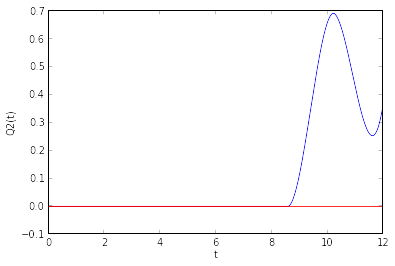

In [10]:
plot(t,Q2,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q2(t)')
n0.Ns
n0.a

print opt1.x